In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
from google.colab import drive
import matplotlib.pyplot as plt
from os.path import join
import pandas as pd
import numpy as np

In [144]:
%matplotlib inline
configure_plotly_browser_state()
ROOT = '/content/drive'     # Raíz del Drive por Default
PROJ = '/content/drive/My Drive/covid'       # Dirección del proyecto en donde este

drive.mount(ROOT, force_remount=True)           # Montamos el drive

Mounted at /content/drive


In [0]:
df_train = pd.read_csv(PROJ+'/data/train.csv')
df_test = pd.read_csv(PROJ+'/data/train.csv')
df_submissions = pd.read_csv(PROJ+'/data/submission.csv')

In [146]:
df_train.tail(5)

Id Province/State  ... ConfirmedCases  Fatalities
16751  26374            NaN  ...            0.0         0.0
16752  26375            NaN  ...            0.0         0.0
16753  26376            NaN  ...            2.0         0.0
16754  26377            NaN  ...            2.0         0.0
16755  26378            NaN  ...            2.0         0.0

[5 rows x 8 columns]

In [147]:
df_test.head(5)

Id Province/State Country/Region  ...        Date  ConfirmedCases Fatalities
0   1            NaN    Afghanistan  ...  2020-01-22             0.0        0.0
1   2            NaN    Afghanistan  ...  2020-01-23             0.0        0.0
2   3            NaN    Afghanistan  ...  2020-01-24             0.0        0.0
3   4            NaN    Afghanistan  ...  2020-01-25             0.0        0.0
4   5            NaN    Afghanistan  ...  2020-01-26             0.0        0.0

[5 rows x 8 columns]

In [0]:
#Convert to date time to better later manipulation
df_train['Date'] = pd.to_datetime(df_train.Date)
df_test['Date'] = pd.to_datetime(df_test.Date)

In [0]:
def missing_values(df):
    s_types = df.dtypes
    s_missing= df.isnull().sum()
    s_missingper= (df.isnull().sum()/df.shape[0])*100

    explo = pd.DataFrame({'Types': s_types,
                       'Missing': s_missing,
                      'Missing%': s_missingper,}).sort_values(by=['Missing%','Types'],ascending=False)
    return explo

def description(df):
    s_types = df.dtypes
    s_head= df.apply(lambda x: x[0:3].tolist())

    explo = pd.DataFrame({'Types': s_types,
                      'Head': s_head}).sort_values(by=['Types'],ascending=False)
    return explo

In [150]:
#Missing Values Train
missing_values(df_train)

Types  Missing   Missing%
Province/State          object     9086  54.225352
Lat                    float64       59   0.352113
Long                   float64       59   0.352113
Country/Region          object        0   0.000000
Date            datetime64[ns]        0   0.000000
ConfirmedCases         float64        0   0.000000
Fatalities             float64        0   0.000000
Id                       int64        0   0.000000

In [151]:
#Missing Values Test
missing_values(df_test)

Types  Missing   Missing%
Province/State          object     9086  54.225352
Lat                    float64       59   0.352113
Long                   float64       59   0.352113
Country/Region          object        0   0.000000
Date            datetime64[ns]        0   0.000000
ConfirmedCases         float64        0   0.000000
Fatalities             float64        0   0.000000
Id                       int64        0   0.000000

In [152]:
#Description
description(df_train)

Types                                               Head
Province/State          object                                    [nan, nan, nan]
Country/Region          object            [Afghanistan, Afghanistan, Afghanistan]
Lat                    float64                                 [33.0, 33.0, 33.0]
Long                   float64                                 [65.0, 65.0, 65.0]
Id                       int64                                          [1, 2, 3]
Date            datetime64[ns]  [2020-01-22 00:00:00, 2020-01-23 00:00:00, 202...
ConfirmedCases         float64                                    [0.0, 0.0, 0.0]
Fatalities             float64                                    [0.0, 0.0, 0.0]

In [153]:
#Description
description(df_test)

Types                                               Head
Province/State          object                                    [nan, nan, nan]
Country/Region          object            [Afghanistan, Afghanistan, Afghanistan]
Lat                    float64                                 [33.0, 33.0, 33.0]
Long                   float64                                 [65.0, 65.0, 65.0]
Id                       int64                                          [1, 2, 3]
Date            datetime64[ns]  [2020-01-22 00:00:00, 2020-01-23 00:00:00, 202...
ConfirmedCases         float64                                    [0.0, 0.0, 0.0]
Fatalities             float64                                    [0.0, 0.0, 0.0]

In [154]:
df_train.describe()

Id           Lat          Long  ConfirmedCases    Fatalities
count  16756.000000  16697.000000  16697.000000    16756.000000  16756.000000
mean   13189.500000     26.337324      5.039603      271.750119      9.221533
std     7624.686932     22.963063     79.935267     3261.152305    141.524582
min        1.000000    -41.454500   -157.498300        0.000000      0.000000
25%     6595.250000     13.193900    -71.530100        0.000000      0.000000
50%    13189.500000     33.000000     10.000000        0.000000      0.000000
75%    19783.750000     42.506300     65.000000        7.000000      0.000000
max    26378.000000     72.000000    174.886000    67800.000000   4032.000000

In [0]:
from pandas_profiling import ProfileReport

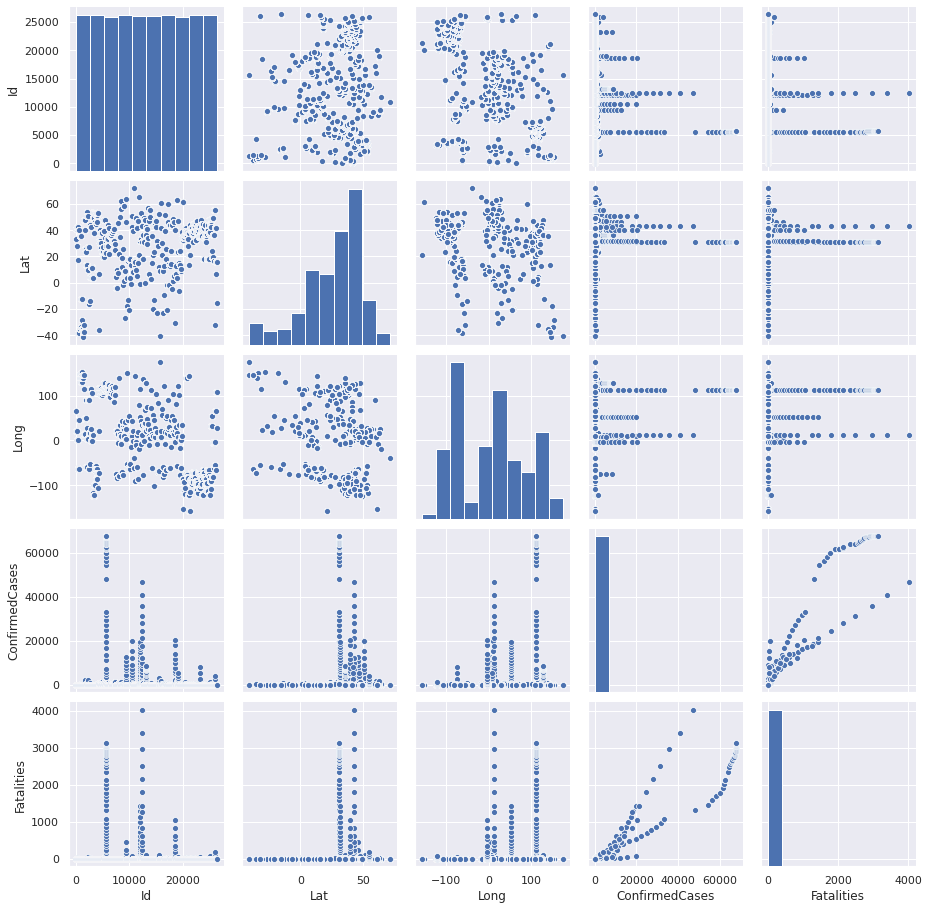

In [156]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()
sns.pairplot(df_train)
plt.show()

In [0]:
train_agg= df_train[['Country/Region','Date','ConfirmedCases','Fatalities']].groupby(['Country/Region','Date'],as_index=False).agg({'ConfirmedCases': 'sum', 'Fatalities': 'sum'})

In [163]:
import IPython
IPython.get_ipython().events.register('pre_run_cell', configure_plotly_browser_state)
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode, plot
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

fig = px.line(train_agg, x='Date', y='ConfirmedCases', color="Country/Region", hover_name="Country/Region")
fig.update_layout(autosize=False,width=1000,height=500,title='Casos Confirmados por tiempo en cada país')
fig.show()

In [159]:
fig2 = px.line(train_agg, x='Date', y='Fatalities', color="Country/Region", hover_name="Country/Region")
fig2.update_layout(autosize=False,width=1000,height=500,title='Muertes por tiempo en cada país')
fig2.show()

In [161]:
import matplotlib
from matplotlib import cm
import numpy as np

norm = matplotlib.colors.Normalize(vmin=0, vmax=255)
def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []

    for k in range(pl_entries):
        C = list(map(np.uint8, np.array(cmap(k*h)[:3])*255))
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])

    return pl_colorscale

In [162]:
# CoronavirusMap
# There's a problem because sometimes the bigger circles overlap the small ones. 
import plotly.graph_objects as go
df_map = df_train

df_map['text'] = 'Confirmed cases:' + df_map['ConfirmedCases'].astype(str) + '<br>Fatalities:' +df_map['Fatalities'].astype(str)
autumn_cmap = matplotlib.cm.get_cmap('autumn_r')
autumn = matplotlib_to_plotly(autumn_cmap, 255)
fig = go.Figure(data=go.Scattergeo(
        lon = df_map['Long'],
        lat = df_map['Lat'],
        text = df_map['text'],
        mode = 'markers',      
        marker = dict(
            size = df_map['ConfirmedCases']*0.0003 + 1,
            opacity = 0.6,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=0.1,
                color='Black'
            ),
            colorscale = autumn,
            cmin = df_map['Fatalities'].min(),
            cmax = df_map['Fatalities'].max(),
            color = df_map['Fatalities'],            
            colorbar_title="Cantidad de muertos",           
        ),
))

fig.update_geos(
    projection_type="kavrayskiy7",
    showcountries=True, countrycolor="#303338",
    showcoastlines=True, coastlinecolor="black",
    showland=True, landcolor="gray",
    showocean=True, oceancolor="dodgerblue",
    showlakes=False,    
)

fig.update_layout(
        title = 'Casos confirmados de coronavirus en el mundo',      
    )
fig.show()